In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("Preprocessed.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
import seaborn as sns

/var/folders/_d/9dyxj4t14ql55yv2t3fzbr7c0000gn/T/ipykernel_91118/2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

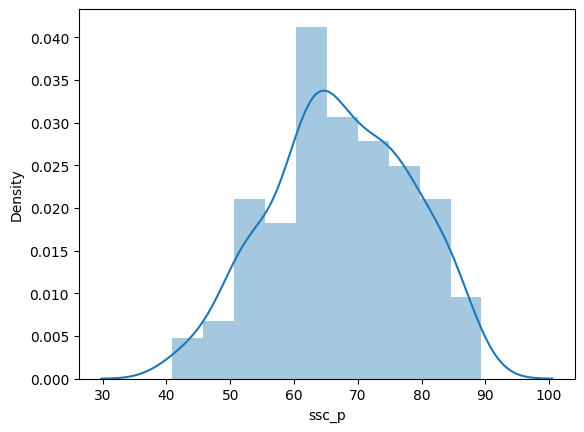

In [6]:
sns.distplot(dataset["ssc_p"])

In [10]:
#Function for the PDF
def get_pdf_probability(dataset,startrange,endrange):
    
    #Importing Libraries
    #Matplotlib is used for Data Visualization, to plot and create charts to understand and represent the data
    from matplotlib import pyplot
    
    #scipy.Stats used for statistical analysis and probability theory
    from scipy.stats import norm

    #Seaborn is used for creating attractive and informative statistical graphics
    import seaborn as sns
    
    #Instead of distplot, histplot, and displot are now.
    #Distplot is to visualize the distribution of a univariate (single) dataset by combining a histogram, 
    #a kernel density estimate (KDE) plot, 
    #and a rug plot to show individual observations
    #KDE - Gives the probability distribution(bell curve), the curve in blue colour, and the histogram in green colour 
    #and saved in a variable
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green') 
    #axvline is a function which is used to draw a vertical line on x-axis, ax means axis, vline is vertical line
    #Drawing a vertical line using matplotlib library, startrange means starting range of the histogram and line colour is red
    pyplot.axvline(startrange,color='Red')
    ##Drawing a vertical line using matplotlib library, endrange means ending range of the histogram and line colour is red
    pyplot.axvline(endrange,color='Red')
    
    # generate a sample
    sample = dataset
    
    # calculate parameters like mean and std to find the probability distribution
    sample_mean =sample.mean()
    sample_std = sample.std()
    #Using f-string, printing the mean and std for the dataset
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    
    # define the normal distribution using the in-built function norm with mean and std
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes using one-line for loop
    #For the given range of data, it is added to the list and stored in the values variables
    values = [value for value in range(startrange, endrange)]

    #The probability distribution is created for the given range and list is stored in the variable
    probabilities = [dist.pdf(value) for value in values]  

    #We are summing the probability and storing it in the prob
    prob=sum(probabilities)
    
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

Mean=67.303, Standard Deviation=10.827
The area between range(40,60):0.23035961179550077


/var/folders/_d/9dyxj4t14ql55yv2t3fzbr7c0000gn/T/ipykernel_91118/3868888824.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.23035961179550077

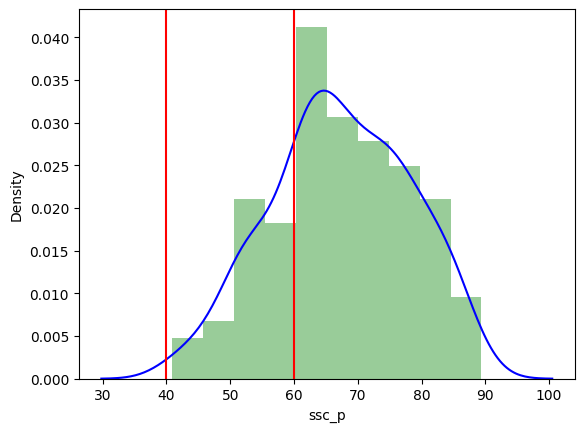

In [11]:
get_pdf_probability(dataset["ssc_p"],40,60)

Mean=67.303, Standard Deviation=10.827
The area between range(70,90):0.39944396647979175


/var/folders/_d/9dyxj4t14ql55yv2t3fzbr7c0000gn/T/ipykernel_91118/3868888824.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


0.39944396647979175

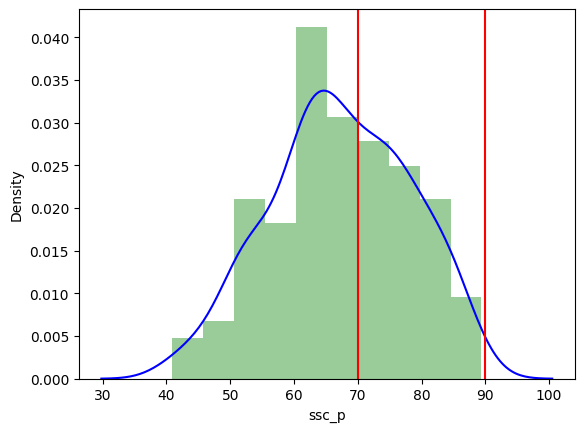

In [24]:
# For the range 30 to 100
get_pdf_probability(dataset["ssc_p"],70,90)
#40% students scored between 70% and 90% in their ssc_p

In [25]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])

In [20]:
#!pip install statsmodels

In [26]:
ecdf(70)

0.6093023255813953

In [ ]:
#60% of students have SSC percentages less than or equal to 70%.